## Historical Context: Society Aboard the Titanic

### The Rigid Class System of 1912
- **First Class**: Wealthy industrialists, aristocrats, celebrities ($4,350+ tickets = ~$150,000 today)
- **Second Class**: Middle-class professionals, clergymen, teachers ($60+ tickets = ~$2,000 today)  
- **Third Class**: Working-class immigrants, laborers ($15-40 tickets = ~$500 today)

### Maritime Law and Social Expectations
- **"Women and children first"** - Birkenhead Drill maritime protocol
- **Class-based ship access** - Different entrances, dining rooms, even deck access
- **Immigration patterns** - Third class largely European immigrants seeking American Dream

### Physical Barriers That Determined Fate
- **Watertight barriers** between classes (literal and social)
- **Lifeboat capacity**: 1,178 people, ship carried 2,224
- **Deck access**: First class closest to lifeboats, third class furthest and behind gates
- **"Steerage"**: Third class passengers literally kept below, behind locked gates

### The Gilded Age Inequality
- **Wealth concentration**: Top 1% owned 40% of wealth (sound familiar?)
- **Immigration boom**: 12+ million immigrants 1900-1910
- **Industrial revolution** creating new class tensions

# Setup of Notebook

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline

## First loop into data

In [14]:
test_df = pd.read_csv('data/test.csv')
train_df = pd.read_csv('data/train.csv')


print("Dataset shape:", train_df.shape)
print("\nFirst 5 rows:")
train_df.head()

Dataset shape: (891, 12)

First 5 rows:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [15]:
train_df.info()

print("\nMissing Values:")
print(train_df.isnull().sum())

print("Describing the dataset:")
train_df.describe()

print("Column names:")
print(train_df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2

# Deciphering the columns

We can observe that there are multiple values that catch our eye. These being the **'Pclass'**, **'Sex'**, **'Age'**, **'SibSp'**.

Upon seeing the data closer we can see that the **'Name'** column also includes status tiitles such as Mr, Mrs, Miss, etc.

Other than these very important key values, we must take a closer look into geographic analysis that is if available cabin locations, embarkation ports. Does ticket patterns say anything? 

Survival Rate:
Survived
0    549
1    342
Name: count, dtype: int64

Overall survival rate: 38.38%


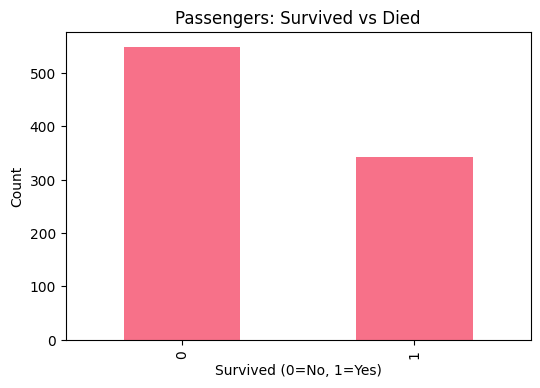

In [16]:
print("Survival Rate:")

survival_rate = train_df['Survived'].value_counts()
print(survival_rate)
print(f"\nOverall survival rate: {train_df['Survived'].mean():.2%}")

plt.figure(figsize=(6, 4))

survival_rate.plot(kind='bar')
plt.title('Passengers: Survived vs Died')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')

plt.show()


Upon examining the devastating survival rate of 38.38%, let us examine how this percentage plays out with other columns?

Firstly, class and gender are examined:

In [17]:
survival_by_class = train_df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
print("Survival by Passenger Class: ")
print(survival_by_class)

survival_by_sex = train_df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
print("\nSurvival by Gender:")
print(survival_by_sex)

Survival by Passenger Class: 
        count  sum      mean
Pclass                      
1         216  136  0.629630
2         184   87  0.472826
3         491  119  0.242363

Survival by Gender:
        count  sum      mean
Sex                         
female    314  233  0.742038
male      577  109  0.188908


As the results show, the first class passengers has survived drastically more compared to other classes. That being said, compared to males, females survived much more. 

Here is a visualization of this:

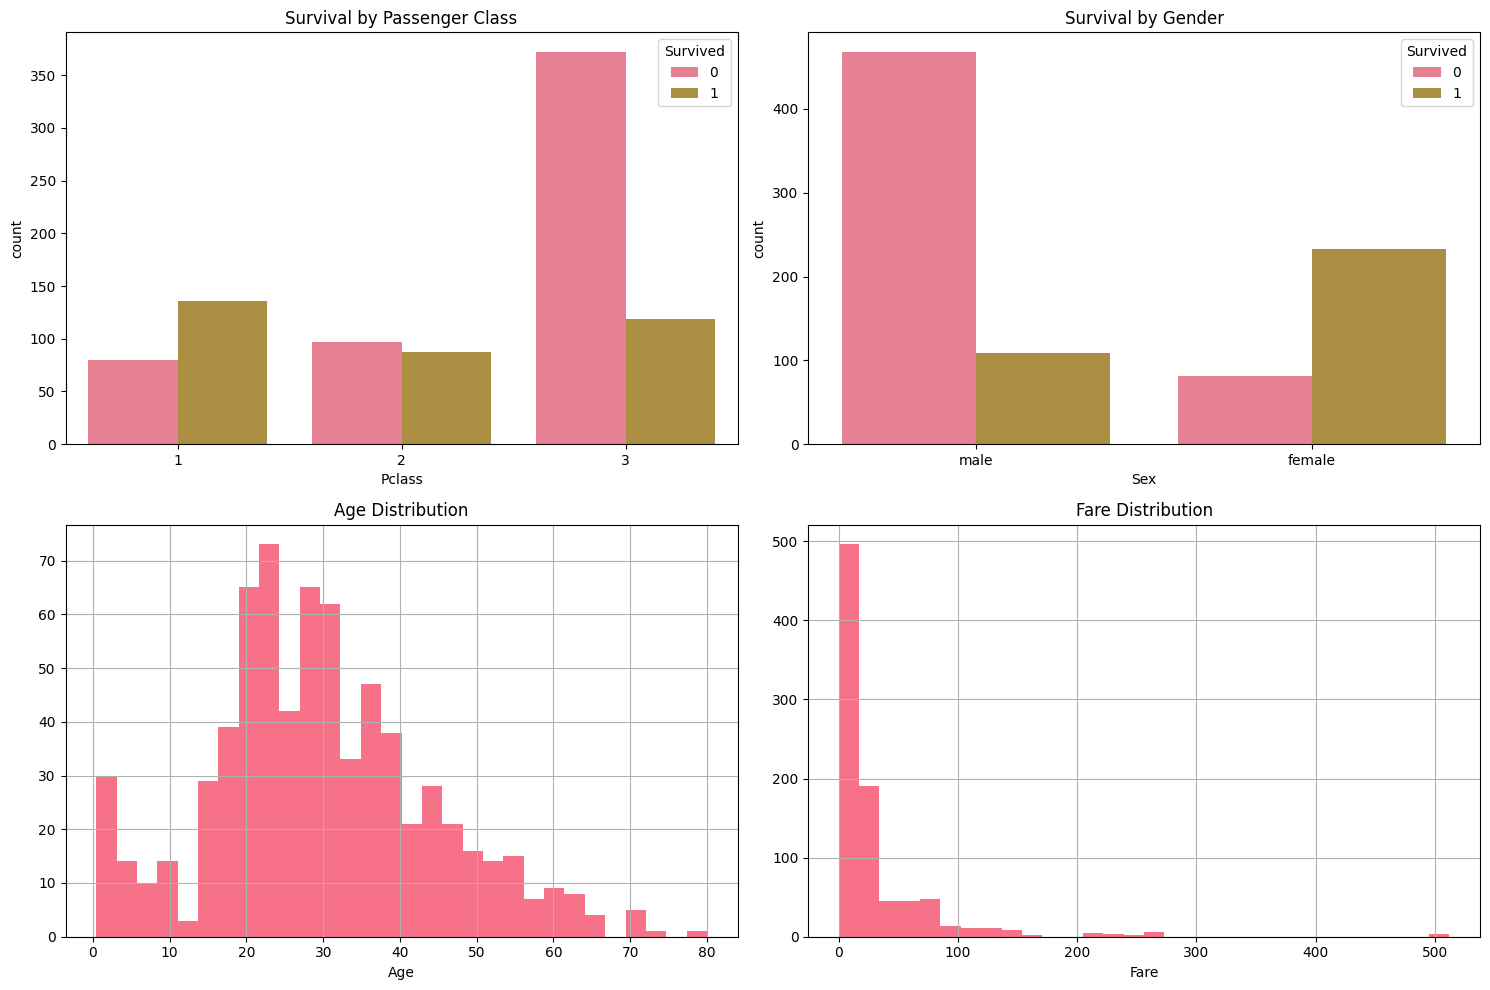

In [18]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived', ax = axes[0,0])
axes[0,0].set_title('Survival by Passenger Class')

sns.countplot(data = train_df, x = 'Sex', hue = 'Survived', ax = axes[0,1])
axes[0,1].set_title('Survival by Gender')

train_df['Age'].hist(bins = 30, ax = axes[1,0])
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')

train_df['Fare'].hist(bins=30, ax=axes[1,1])
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare')

plt.tight_layout()
plt.show()

To analyze further, here are combined results:

In [19]:
survival_class_gender = train_df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print("Survival Rate by Class AND Gender:")
print(survival_class_gender)

Survival Rate by Class AND Gender:
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


This is a remarkable result as %96.8 First class women has survived. Now let's visualize this as a heatmap:

Survival Rate Matrix:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


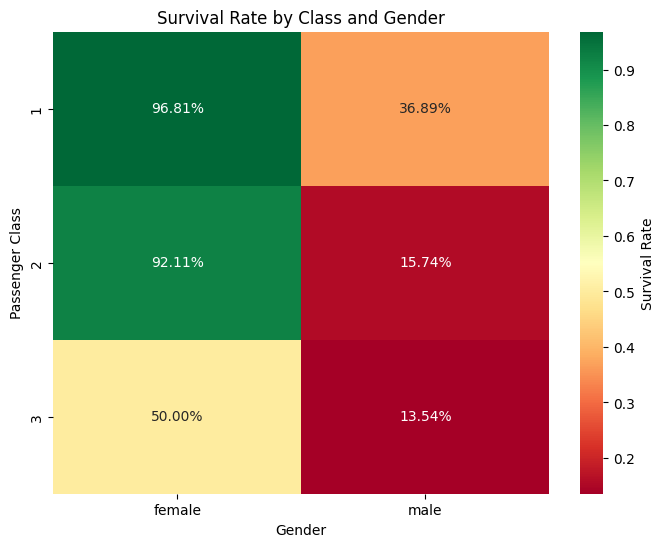

In [20]:
survival_pivot = train_df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print("Survival Rate Matrix:")
print(survival_pivot)

plt.figure(figsize = (8, 6))

sns.heatmap(survival_pivot, annot = True, cmap = 'RdYlGn', fmt = '.2%', cbar_kws = {'label': 'Survival Rate'})
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Passenger Class')
plt.xlabel('Gender')

plt.show()

Another big important column was the age, as the Birkenhead drill code suggests **"Women and children first"**, but did it play a big role?

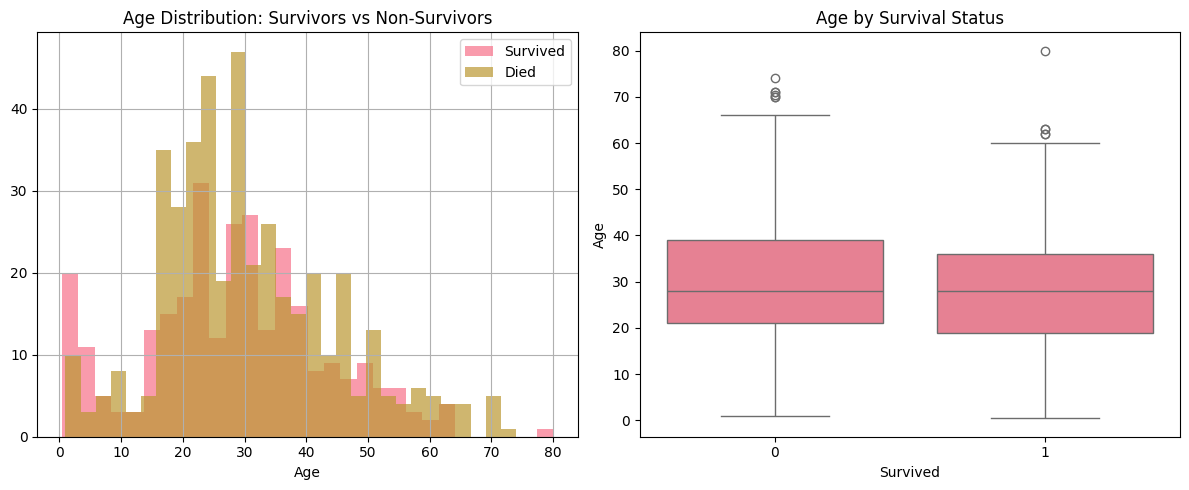

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

train_df[train_df['Survived']==1]['Age'].hist(alpha=0.7, label='Survived', bins=30)
train_df[train_df['Survived']==0]['Age'].hist(alpha=0.7, label='Died', bins=30)

plt.legend()
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.xlabel('Age')

plt.subplot(1, 2, 2)

sns.boxplot(data=train_df, x='Survived', y='Age')
plt.title('Age by Survival Status')

plt.tight_layout()
plt.show()

We can clearly observer that age mattered a huge portion here.

Survival by Family Size:
            count   mean
FamilySize              
1             537  0.304
2             161  0.553
3             102  0.578
4              29  0.724
5              15  0.200
6              22  0.136
7              12  0.333
8               6  0.000
11              7  0.000


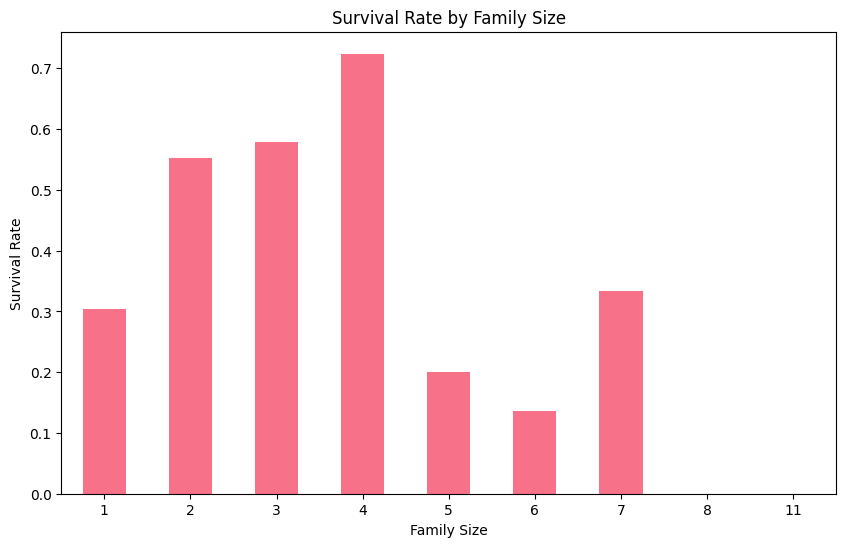

In [22]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

family_survival = train_df.groupby('FamilySize')['Survived'].agg(['count', 'mean']).round(3)
print("Survival by Family Size:")
print(family_survival)

plt.figure(figsize=(10, 6))
family_survival['mean'].plot(kind='bar')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

There seems to be an interesting correlation between family size and survival rate, as more children or family members they have does not mean their survival rate increases.

To test this theory:

In [23]:
print("Family Size by Class:")
print(train_df.groupby(['Pclass', 'FamilySize']).size().unstack(fill_value=0))

print("\nAverage class by family size:")
print(train_df.groupby('FamilySize')['Pclass'].mean())

Family Size by Class:
FamilySize   1   2   3   4   5   6   7   8   11
Pclass                                         
1           109  70  24   7   2   4   0   0   0
2           104  34  31  13   1   1   0   0   0
3           324  57  47   9  12  17  12   6   7

Average class by family size:
FamilySize
1     2.400372
2     1.919255
3     2.225490
4     2.068966
5     2.666667
6     2.590909
7     3.000000
8     3.000000
11    3.000000
Name: Pclass, dtype: float64


It seems that most people went by solo. 2 people travelling together seems to take some count in first class too. As the avg class by family size gets closer to 1, it is expected that the family size it is have a greater chance of survival. Such as 11 is 3 that is %0 survival rate.
2 is 1.9 which is a greate deal! But 4 is 2.06 despite being larger than 2 its avg class by family size is bigger. That means there seems to be psychological play here. Maybe parents insisted their wives or children to go first?
Let's test this theory:

In [24]:
# Let's look at families of size 4 more closely
family_4 = train_df[train_df['FamilySize'] == 4]
print("Family size 4 breakdown:")
print("Gender distribution:")
print(family_4['Sex'].value_counts())
print("\nAge statistics:")
print(family_4['Age'].describe())
print("\nSurvival by gender in size-4 families:")
print(family_4.groupby('Sex')['Survived'].agg(['count', 'mean']))

Family size 4 breakdown:
Gender distribution:
Sex
female    19
male      10
Name: count, dtype: int64

Age statistics:
count    27.000000
mean     18.274815
std      14.304131
min       0.750000
25%       3.500000
50%      23.000000
75%      28.000000
max      48.000000
Name: Age, dtype: float64

Survival by gender in size-4 families:
        count      mean
Sex                    
female     19  0.842105
male       10  0.500000


It seems that the family of 4 had a mean of age 27. Survival by gender is 0.8 for females and 0.5 for males which is a huge number! Even this alone makes me think that these family size of 4 families might be in first class or have children as the mean of the age is 18 with a max of 48 and min of 0.75 thus family of 4 probably had the most children!

Basically:

- Mean age 27 = Young parents with small children
- Age range 0.75 to 48 = Definitely families with babies/toddlers
- Female survival 80% = "Women and children first" in action
- Male survival 50% = Even fathers did better (normal male rate was much lower)

Now let's check the children more throughly and confirm this.

In [25]:
print("Children (under 18) by family size:")
children_by_family = train_df[train_df['Age'] < 18].groupby('FamilySize').size()
print(children_by_family)

print("\nProportion of each family size that includes children:")
family_with_children = train_df.groupby('FamilySize').apply(lambda x: (x['Age'] < 18).any().sum() / len(x))
print(family_with_children)

Children (under 18) by family size:
FamilySize
1    23
2    18
3    28
4    12
5     5
6    13
7     9
8     5
dtype: int64

Proportion of each family size that includes children:
FamilySize
1     0.001862
2     0.006211
3     0.009804
4     0.034483
5     0.066667
6     0.045455
7     0.083333
8     0.166667
11    0.000000
dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_29604\2958537824.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  family_with_children = train_df.groupby('FamilySize').apply(lambda x: (x['Age'] < 18).any().sum() / len(x))


As we can see there were solo travelling kids! Who could these be?

My instinct instantly tells me that they may be:
- Servants/employees traveling with wealthy families (but recorded separately)
- Older teenagers (16-17) working as crew or traveling independently
- Tragic cases - kids who lost parents during boarding or in processing
- Data errors - maybe some family connections weren't recorded properly

The fact that family size of 3 had THE MOST children (28) but family size 4 had better survival rates confirms the family theory even more as these 3 people families might have been:

- Single parent + 2 kids (harder to manage)
- Grandparent + parent + child (older, slower)
- 2 parents + 1 older child (less "women and children first" priority)

One last check will include class, children and family size altogether!

In [26]:
print("SURVIVAL ANALYSIS: Class + Family Size + Children")
print("=" * 50)

# Clean approach - remove the old broken variable first
if 'HasChildren' in train_df.columns:
    train_df = train_df.drop('HasChildren', axis=1)

# Correct variables
train_df['IsChild'] = train_df['Age'] < 18
train_df['HasChildrenInFamily'] = train_df['Parch'] > 0  # Parch = parents/children aboard

# Analysis 1: By individual child status
print("ANALYSIS 1 - By Individual Child Status:")
corrected_analysis = train_df.groupby(['Pclass', 'FamilySize', 'IsChild'])['Survived'].agg(['count', 'mean']).round(3)
print(corrected_analysis)

# Analysis 2: By family having children 
print("\n" + "="*50)
print("ANALYSIS 2 - By Family Having Children:")
family_analysis = train_df.groupby(['Pclass', 'FamilySize', 'HasChildrenInFamily'])['Survived'].agg(['count', 'mean']).round(3)
print(family_analysis)

# Analysis 3: Pivot table
print("\n" + "="*50)
print("PIVOT: Survival Rate by Class and Family Size")
survival_pivot = train_df.pivot_table(
    values='Survived', 
    index=['Pclass', 'HasChildrenInFamily'], 
    columns='FamilySize', 
    aggfunc='mean'
).round(3)
print(survival_pivot)

SURVIVAL ANALYSIS: Class + Family Size + Children
ANALYSIS 1 - By Individual Child Status:
                           count   mean
Pclass FamilySize IsChild              
1      1          False      108  0.528
                  True         1  1.000
       2          False       65  0.708
                  True         5  1.000
       3          False       22  0.727
                  True         2  1.000
       4          False        3  0.667
                  True         4  0.750
       5          False        2  1.000
       6          False        4  0.500
2      1          False      100  0.340
                  True         4  0.500
       2          False       31  0.484
                  True         3  1.000
       3          False       19  0.474
                  True        12  1.000
       4          False        9  0.667
                  True         4  1.000
       5          False        1  1.000
       6          False        1  1.000
3      1          False      

This changes everything!!

For the first class it goes like this!
Almost all children survived except for family of 4 having 0.75 with 4 chilren so 1 died (probably an accident or sth not too mcuh mattering.) We can say that there is a great survival rate almost astronomicaly for the chilren of class 1.
For class 2 we have:
only solo travellers have even 0.5 survival rate (probably working class I think)
other family sizes are 1!
For 3rd class the situation gets dire...
As solo travelling children (18 ppl) has a 0.3 mean! Compared to family of 4 having 1.0, family of three having 0.5, family of 2 having 0.7 this is a drastic number. Probably family support played a big role here.

Now whether have children or not:
In first class the maximum is a 1 for family of 5 with 2 instances, as the data is too low we might not need to heed to this. But for 3 for families with children they have 0.72 compared to 0.667 for families that did not have children.  Only case that this number is lower than not having children is families of 2 with families that do not have children have a mean of 0.76 and that has 0.63? Interesting!

For class 2 this numbers gets more and more drastic as we see that everyone in class 2 thast travelled as 1 did not have any children  and their survival rate is 0.3! For 2 we see a x2 change as false is 0.4 and true is 0.8 This is drastic! Other sizes also prove the same.

For class 3, situtation gets even dire as eeven some families that have children did not survive with 0.0 percent such as 5, 6, 8, 11!

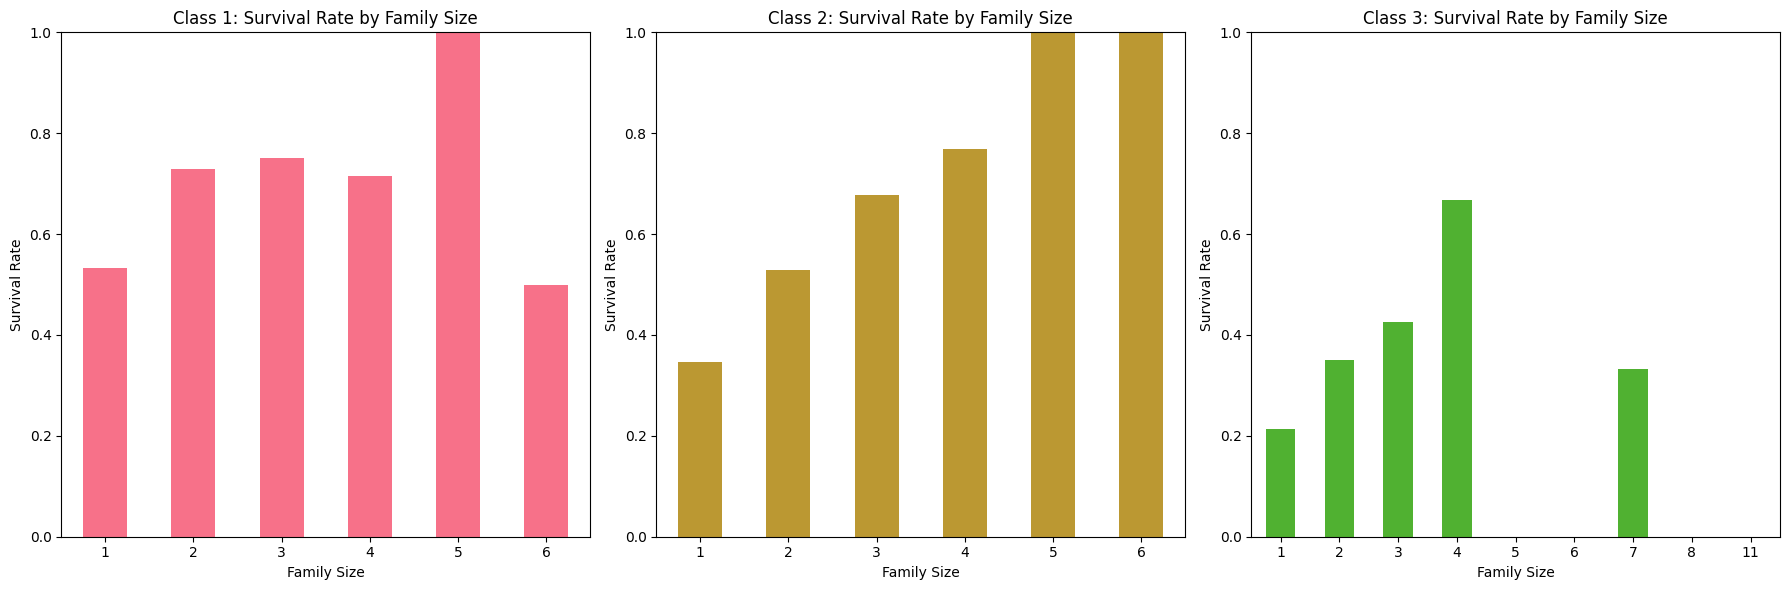

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, pclass in enumerate([1, 2, 3]):
    class_data = train_df[train_df['Pclass'] == pclass]
    
    survival_by_family = class_data.groupby('FamilySize')['Survived'].mean()
    survival_by_family.plot(kind='bar', ax=axes[i], color=f'C{i}')
    
    axes[i].set_title(f'Class {pclass}: Survival Rate by Family Size')
    axes[i].set_ylabel('Survival Rate')
    axes[i].set_xlabel('Family Size')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].set_ylim(0, 1)  # Added this to make comparisons easier

plt.tight_layout()
plt.show()

Okay this just showed that family sizes for class one and two actually piqued for size 5 (class 1) and 5, 6 (class 2) BUT the reason we got that family size of 4 was the max BECAUSE class 3 had a %0 survival rates for 5 and 6! Thus it wasnt that they were uncoordinated, class 3 was the unlucky ones to not make it... For class 3 we see that family of 4 survived most thus this supports as well!

For the last bit of the puzzle, let's examine how class effected children specifically. As we had seen that they are really important!

CHILDREN'S SURVIVAL BY CLASS:
        count   mean
Pclass              
1          12  0.917
2          23  0.913
3          78  0.372

CHILDREN'S AGE STATS BY CLASS:
        count       mean       std   min   25%   50%    75%   max
Pclass                                                           
1        12.0  12.160000  6.204538  0.92  9.25  15.5  16.25  17.0
2        23.0   6.623043  5.857934  0.67  2.00   4.0  10.50  17.0
3        78.0   9.274615  5.854412  0.42  4.00   9.0  15.75  17.0


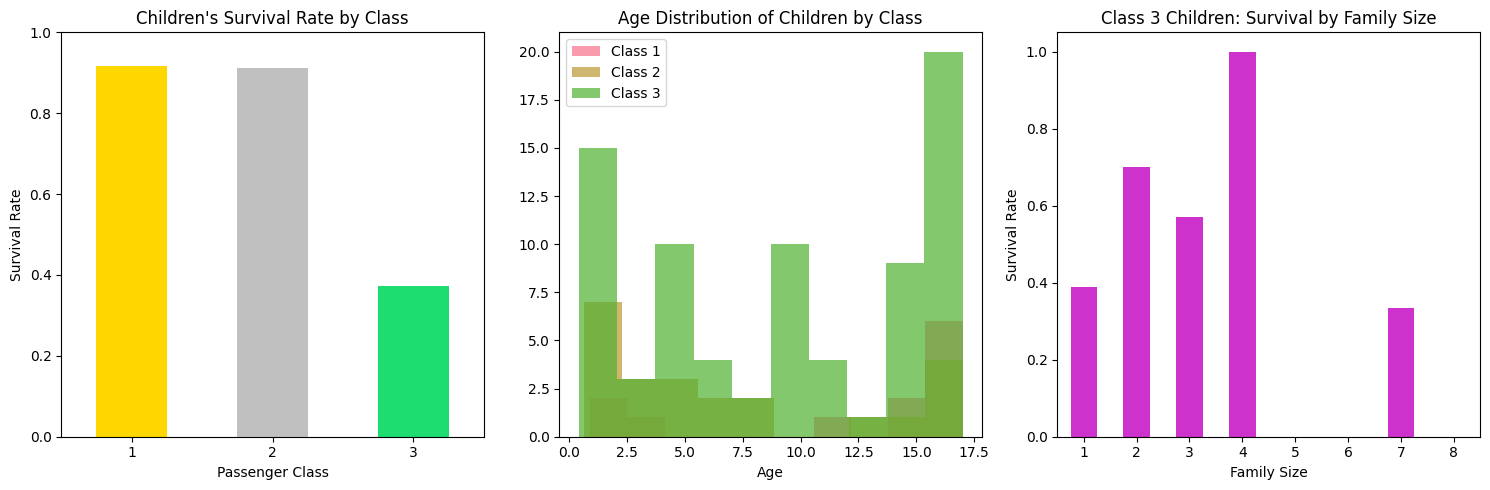

In [28]:
print("CHILDREN'S SURVIVAL BY CLASS:")
print("=" * 40)

children_only = train_df[train_df['IsChild'] == True]
children_survival = children_only.groupby('Pclass')['Survived'].agg(['count', 'mean']).round(3)
print(children_survival)

print("\nCHILDREN'S AGE STATS BY CLASS:")
print(children_only.groupby('Pclass')['Age'].describe())

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

children_survival['mean'].plot(kind='bar', ax=axes[0], color=['gold', 'silver', "#1DDC70"])
axes[0].set_title('Children\'s Survival Rate by Class')
axes[0].set_ylabel('Survival Rate')
axes[0].set_xlabel('Passenger Class')
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_ylim(0, 1)

for i, pclass in enumerate([1, 2, 3]):
    class_children = children_only[children_only['Pclass'] == pclass]
    axes[1].hist(class_children['Age'], alpha=0.7, label=f'Class {pclass}', bins=10)
axes[1].set_title('Age Distribution of Children by Class')
axes[1].set_xlabel('Age')
axes[1].legend()

class3_children = children_only[children_only['Pclass'] == 3]
class3_child_survival = class3_children.groupby('FamilySize')['Survived'].mean()
class3_child_survival.plot(kind='bar', ax=axes[2], color="#CD32CD")
axes[2].set_title('Class 3 Children: Survival by Family Size')
axes[2].set_ylabel('Survival Rate')
axes[2].set_xlabel('Family Size')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Additionally let's check solo travelling children:

In [29]:
# The most tragic cases: solo working-class children
solo_poor_children = train_df[(train_df['Pclass'] == 3) & 
                             (train_df['FamilySize'] == 1) & 
                             (train_df['IsChild'] == True)]

print(f"\nSOLO THIRD-CLASS CHILDREN:")
print(f"Count: {len(solo_poor_children)}")
print(f"Survival rate: {solo_poor_children['Survived'].mean():.1%}")
print(f"Average age: {solo_poor_children['Age'].mean():.1f} years")

print("\nTheir stories:")
print(solo_poor_children[['Name', 'Age', 'Sex', 'Survived']].to_string())


SOLO THIRD-CLASS CHILDREN:
Count: 18
Survival rate: 38.9%
Average age: 15.0 years

Their stories:
                                     Name   Age     Sex  Survived
14   Vestrom, Miss. Hulda Amanda Adolfina  14.0  female         0
22            McGowan, Miss. Anna "Annie"  15.0  female         1
114                 Attalah, Miss. Malake  17.0  female         0
138                   Osen, Mr. Olaf Elon  16.0    male         0
156      Gilnagh, Miss. Katherine "Katie"  16.0  female         1
163                       Calic, Mr. Jovo  17.0    male         0
208             Carr, Miss. Helen "Ellen"  16.0  female         1
220        Sunderland, Mr. Victor Francis  16.0    male         1
282             de Pelsmaeker, Mr. Alfons  16.0    male         0
433            Kallio, Mr. Nikolai Erland  17.0    male         0
500                      Calic, Mr. Petar  17.0    male         0
574          Rush, Mr. Alfred George John  16.0    male         0
731              Hassan, Mr. Houssein G N  

Even though class 3 had the most children, class 3 had the least survival rate. 

**Thus it wasn't children first, it was children with parents and with status first.** 

We can see that through 1, 2 classes had around 0.9 but class 3 had 0.3! The situation gets even more drastic as we observe that class 3 had a count of 78 when class 1 and class 2 had 12 and 23 respectively. This number might have been this low because of the lack of spaces for children as we know that there wasn't enough space for everyone thus first class 1 emptied out then two so even for children in class 3 there wasn't any space for escape.

For solo travelling children, this is weird because there was a kid 5 years old?? How does that even happen? But survival rate is 38.9% with an avg age of 15 years!

In [30]:
# Let's see who that poor kid was
youngest_solo = solo_poor_children[solo_poor_children['Age'] == solo_poor_children['Age'].min()]
print("The youngest solo traveler:")
print(youngest_solo[['Name', 'Age', 'Sex', 'Survived']])

The youngest solo traveler:
                              Name  Age     Sex  Survived
777  Emanuel, Miss. Virginia Ethel  5.0  female         1


# Embarkation Analysis

From the dataset, it has been written out as:
- C = Cherbourg, 
- Q = Queenstown,
- S = Southampton

Upon closer look to these cities:

### Cherbourg (France)

This city was a stopping point for prestigious transatlantic liners. We can say that they were **wealthy passengers**.

### Queenstown (Ireland)

As the situation in Ireland was not so good (Irish famine and emigration and political situations) we can imagine that **refugees** wanted to move into USA.

### Southampton (England)

At the time, apart from a change of monarch there does not seem to be an important situation thus we can expect a **mix of passengers.**

In [31]:
print("EMBARKATION ANALYSIS")
print("=" * 50)

# Basic embarkation info
embark_counts = train_df['Embarked'].value_counts()
print("Passengers by embarkation port:")
print("S = Southampton, England")
print("C = Cherbourg, France") 
print("Q = Queenstown, Ireland")
print(embark_counts)

# Handle missing values
print(f"\nMissing embarkation data: {train_df['Embarked'].isnull().sum()}")

# Let's see who those missing passengers were
missing_embark = train_df[train_df['Embarked'].isnull()]
print("\nPassengers with missing embarkation:")
print(missing_embark[['Name', 'Pclass', 'Fare', 'Survived']])

EMBARKATION ANALYSIS
Passengers by embarkation port:
S = Southampton, England
C = Cherbourg, France
Q = Queenstown, Ireland
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Missing embarkation data: 2

Passengers with missing embarkation:
                                          Name  Pclass  Fare  Survived
61                         Icard, Miss. Amelie       1  80.0         1
829  Stone, Mrs. George Nelson (Martha Evelyn)       1  80.0         1


Now to test out whether the claim was true about refugees, wealthy passengers and mixed passengers let us examine by class:

In [32]:
# The key analysis: Class distribution by port
print("\nCLASS DISTRIBUTION BY PORT:")
class_by_port = pd.crosstab(train_df['Embarked'], train_df['Pclass'], 
                           margins=True, normalize='index') * 100
print(class_by_port.round(1))

# Survival by embarkation
print("\nSURVIVAL BY EMBARKATION PORT:")
embark_survival = train_df.groupby('Embarked')['Survived'].agg(['count', 'mean']).round(3)
print(embark_survival)


CLASS DISTRIBUTION BY PORT:
Pclass       1     2     3
Embarked                  
C         50.6  10.1  39.3
Q          2.6   3.9  93.5
S         19.7  25.5  54.8
All       24.1  20.7  55.2

SURVIVAL BY EMBARKATION PORT:
          count   mean
Embarked              
C           168  0.554
Q            77  0.390
S           644  0.337


This further supports the theory of those of status having a better survival chance.

Now let us visualize this:

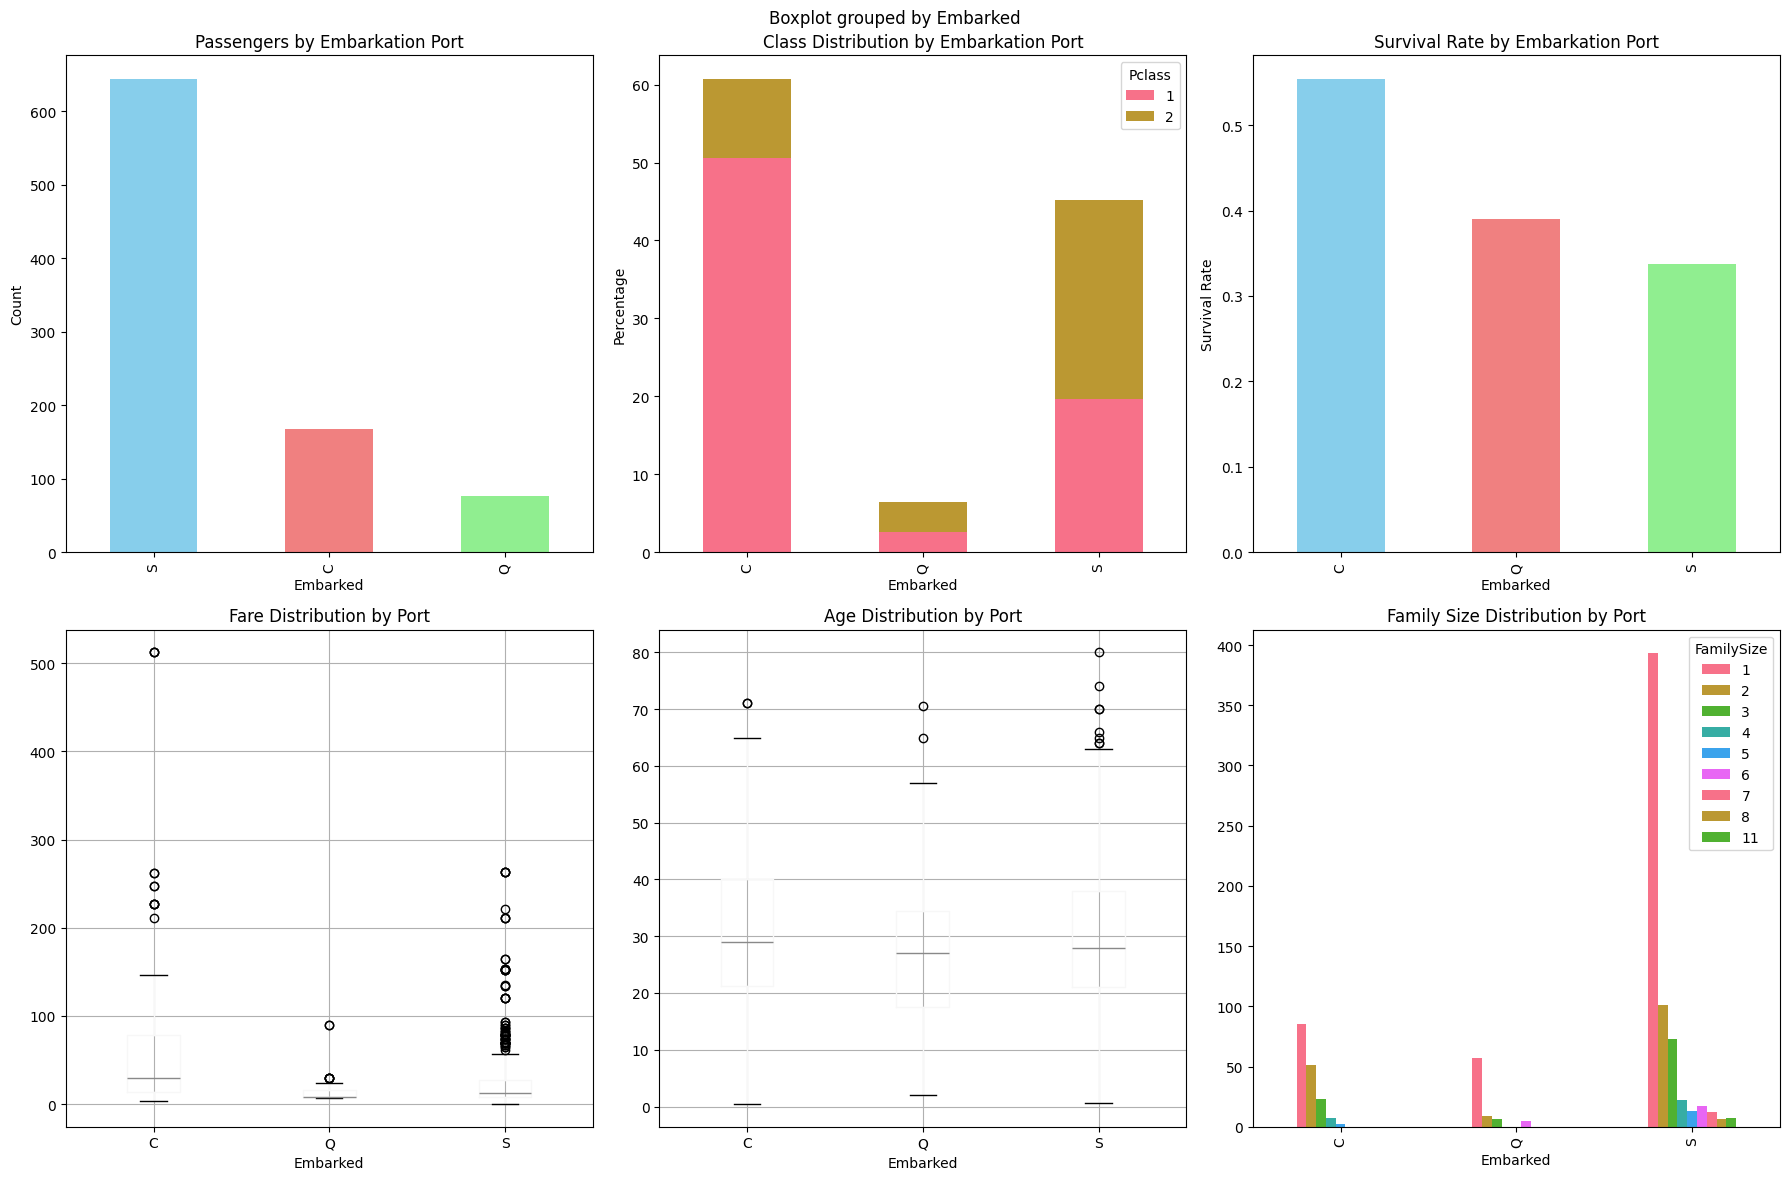

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

embark_counts.plot(kind='bar', ax=axes[0,0], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,0].set_title('Passengers by Embarkation Port')
axes[0,0].set_ylabel('Count')

class_by_port.iloc[:-1, :-1].plot(kind='bar', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Class Distribution by Embarkation Port')
axes[0,1].set_ylabel('Percentage')

embark_survival['mean'].plot(kind='bar', ax=axes[0,2], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,2].set_title('Survival Rate by Embarkation Port')
axes[0,2].set_ylabel('Survival Rate')

train_df.boxplot(column='Fare', by='Embarked', ax=axes[1,0])
axes[1,0].set_title('Fare Distribution by Port')

train_df.boxplot(column='Age', by='Embarked', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Port')

embark_family = train_df.groupby(['Embarked', 'FamilySize']).size().unstack(fill_value=0)
embark_family.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Family Size Distribution by Port')

plt.tight_layout()
plt.show()

This analysis yet again supports our theory. Those departed from cherbourg has a mean of 0.5 compared to 0.39 (Q) and 0.33 (S). And the reason why Q is higher than S in terms of survival mean is because those embarked at S had a higher solo travellers thus they probably had less chance. We should test this out.

In [34]:
print("SOLO TRAVELERS BY EMBARKATION PORT")
print("=" * 50)

# Solo travelers (FamilySize = 1) by port
solo_by_port = train_df[train_df['FamilySize'] == 1].groupby('Embarked').agg({
    'Survived': ['count', 'mean'],
    'Pclass': 'mean',
    'Age': 'mean'
}).round(3)

print("Solo travelers analysis:")
print(solo_by_port)

# Compare solo vs family travelers by port
print("\nSOLO vs FAMILY COMPARISON BY PORT:")
for port in ['S', 'C', 'Q']:
    if port in train_df['Embarked'].values:
        port_data = train_df[train_df['Embarked'] == port]
        solo_survival = port_data[port_data['FamilySize'] == 1]['Survived'].mean()
        family_survival = port_data[port_data['FamilySize'] > 1]['Survived'].mean()
        solo_count = len(port_data[port_data['FamilySize'] == 1])
        total_count = len(port_data)
        
        print(f"\n{port} Port:")
        print(f"  Solo travelers: {solo_count}/{total_count} ({solo_count/total_count:.1%})")
        print(f"  Solo survival: {solo_survival:.1%}")
        print(f"  Family survival: {family_survival:.1%}")
        print(f"  Difference: {family_survival - solo_survival:.1%}")

SOLO TRAVELERS BY EMBARKATION PORT
Solo travelers analysis:
         Survived        Pclass     Age
            count   mean   mean    mean
Embarked                               
C              85  0.435  1.965  33.086
Q              57  0.404  2.947  30.395
S             393  0.257  2.422  32.063

SOLO vs FAMILY COMPARISON BY PORT:

S Port:
  Solo travelers: 393/644 (61.0%)
  Solo survival: 25.7%
  Family survival: 46.2%
  Difference: 20.5%

C Port:
  Solo travelers: 85/168 (50.6%)
  Solo survival: 43.5%
  Family survival: 67.5%
  Difference: 23.9%

Q Port:
  Solo travelers: 57/77 (74.0%)
  Solo survival: 40.4%
  Family survival: 35.0%
  Difference: -5.4%


Let's first anaylze how these port numbers interact with each other and then how they act in itself.

First we can see that even though the most solo travellers embarked from Q Port, they had a lower percentage than C port that is 40.4% and 43.5%! In fact the least solo travellers was with C port. Even though S and C port seem very close, the only difference is that C port had a higher survival rate. That is solo survival and family survival had a difference of 20~% difference.

But we can see that Q Port which we had predicted that refugees embarked at has a weird situation!
Q Port had a survival rate of 40.4% and family survival of 35%! This is a difference of -5.4%!

In [35]:
print("QUEENSTOWN ANOMALY INVESTIGATION")
print("=" * 50)

q_port = train_df[train_df['Embarked'] == 'Q']

print("Q Port Solo vs Family breakdown:")
print("\nSOLO TRAVELERS (Q):")
q_solo = q_port[q_port['FamilySize'] == 1]
print(f"Count: {len(q_solo)}")
print(f"Average Class: {q_solo['Pclass'].mean():.2f}")
print(f"Average Age: {q_solo['Age'].mean():.1f}")
print(f"Gender split:")
print(q_solo['Sex'].value_counts(normalize=True))

print("\nFAMILIES (Q):")
q_families = q_port[q_port['FamilySize'] > 1]
print(f"Count: {len(q_families)}")
print(f"Average Class: {q_families['Pclass'].mean():.2f}")
print(f"Average Family Size: {q_families['FamilySize'].mean():.1f}")
print(f"Gender split:")
print(q_families['Sex'].value_counts(normalize=True))

print("\nFamily sizes in Q port:")
print(q_families['FamilySize'].value_counts().sort_index())


QUEENSTOWN ANOMALY INVESTIGATION
Q Port Solo vs Family breakdown:

SOLO TRAVELERS (Q):
Count: 57
Average Class: 2.95
Average Age: 30.4
Gender split:
Sex
male      0.526316
female    0.473684
Name: proportion, dtype: float64

FAMILIES (Q):
Count: 20
Average Class: 2.80
Average Family Size: 3.3
Gender split:
Sex
male      0.55
female    0.45
Name: proportion, dtype: float64

Family sizes in Q port:
FamilySize
2    9
3    6
6    5
Name: count, dtype: int64
